<a href="https://colab.research.google.com/github/Parkgyutae0401/Park-Gyutae/blob/main/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import FinanceDataReader as fdr

In [5]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

In [ ]:
#Open: 시가 High: 고가 Low: 저가 Close: 종가 Volume: 거래량 Change: 대비

In [ ]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-04-04,63400,63800,62800,63600,11120514,0.007924
2023-04-05,63700,64000,63400,63900,9176149,0.004717
2023-04-06,63500,63600,62300,62300,14992747,-0.025039
2023-04-07,63800,65200,63800,65000,27476120,0.043339
2023-04-10,64800,66300,64700,65700,18734951,0.010769


In [6]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [7]:
stock = fdr.DataReader(STOCK_CODE)

In [9]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-12-21,1438,1509,1407,1509,720335,NaN
1998-12-22,1509,1536,1446,1456,659030,-0.035123
1998-12-23,1513,1520,1482,1494,496480,0.026099
1998-12-24,1522,1549,1488,1532,941106,0.025435
1998-12-28,1570,1570,1503,1546,537290,0.009138


In [8]:
stock.index

DatetimeIndex(['1998-12-21', '1998-12-22', '1998-12-23', '1998-12-24',
               '1998-12-28', '1999-01-04', '1999-01-05', '1999-01-06',
               '1999-01-07', '1999-01-08',
               ...
               '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31',
               '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06',
               '2023-04-07', '2023-04-10'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [10]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [11]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-12-21,1438,1509,1407,1509,720335,NaN,1998,12,21
1998-12-22,1509,1536,1446,1456,659030,-0.035123,1998,12,22
1998-12-23,1513,1520,1482,1494,496480,0.026099,1998,12,23
1998-12-24,1522,1549,1488,1532,941106,0.025435,1998,12,24
1998-12-28,1570,1570,1503,1546,537290,0.009138,1998,12,28


Text(0, 0.5, 'price')

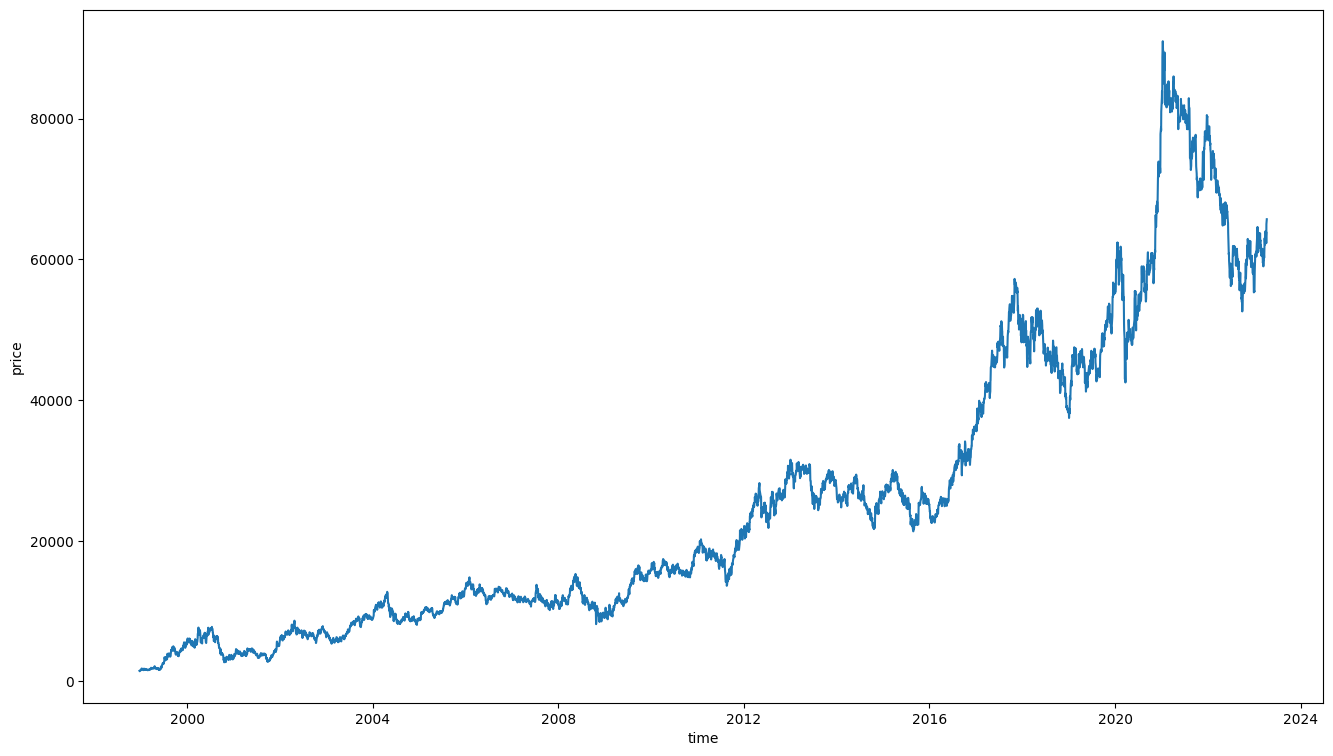

In [12]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

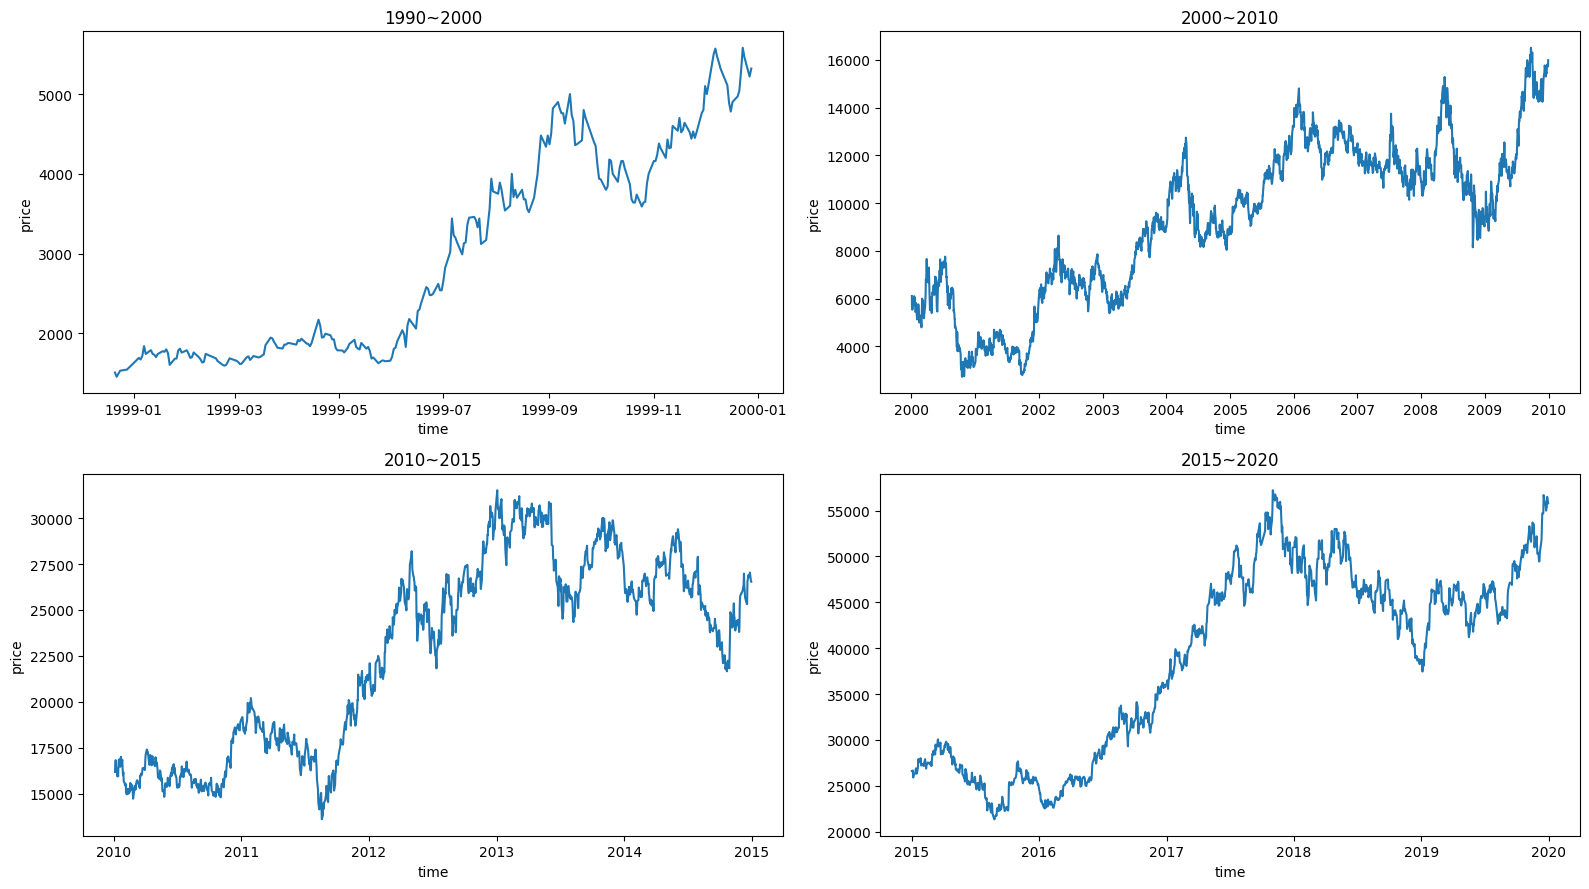

In [13]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled


array([[1.59246955e-02, 1.55888430e-02, 1.57206704e-02, 5.91887787e-04,
        7.97658614e-03],
       [1.67109635e-02, 1.58677686e-02, 1.61564246e-02, 0.00000000e+00,
        7.29772893e-03],
       [1.67552602e-02, 1.57024793e-02, 1.65586592e-02, 4.24372376e-04,
        5.49774131e-03],
       ...,
       [7.03211517e-01, 6.57024793e-01, 6.96089385e-01, 6.79487179e-01,
        1.66021279e-01],
       [7.06533776e-01, 6.73553719e-01, 7.12849162e-01, 7.09639954e-01,
        3.04255156e-01],
       [7.17607973e-01, 6.84917355e-01, 7.22905028e-01, 7.17457339e-01,
        2.07460349e-01]])

In [16]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [19]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [20]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [21]:
x_train

,Open,High,Low,Volume
0,0.015925,0.015589,0.015721,0.007977
1,0.016711,0.015868,0.016156,0.007298
2,0.016755,0.015702,0.016559,0.005498
3,0.016855,0.016002,0.016626,0.010421
4,0.017386,0.016219,0.016793,0.005950
...,...,...,...,...
4795,0.560354,0.537190,0.563128,0.189306
4796,0.575858,0.537190,0.570950,0.091791
4797,0.564784,0.545455,0.567598,0.168397
4798,0.581395,0.547521,0.581006,0.108385


In [22]:
import tensorflow as tf

In [23]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [24]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [25]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [26]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [28]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [29]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [30]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    148/Unknown - 7s 21ms/step - loss: 1.6355e-04 - mse: 3.2710e-04
Epoch 1: val_loss improved from inf to 0.00143, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 8s 29ms/step - loss: 1.6265e-04 - mse: 3.2530e-04 - val_loss: 0.0014 - val_mse: 0.0029
Epoch 2/50
148/150 [============================>.] - ETA: 0s - loss: 4.2324e-05 - mse: 8.4649e-05
Epoch 2: val_loss improved from 0.00143 to 0.00093, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 3s 16ms/step - loss: 4.3511e-05 - mse: 8.7021e-05 - val_loss: 9.3192e-04 - val_mse: 0.0019
Epoch 3/50
150/150 [==============================] - ETA: 0s - loss: 4.2833e-05 - mse: 8.5666e-05
Epoch 3: val_loss did not improve from 0.00093
150/150 [==============================] - 4s 26ms/step - loss: 4.2833e-05 - mse: 8.5666e-05 - val_loss: 0.0010 - val_mse: 0.0020
Epoch 4/50
149/150 [============================>.] - ETA: 0s - loss: 3.7620e-05 - mse: 7.5239e-05
Epoch 4

In [31]:
model.load_weights(filename)

In [32]:
pred = model.predict(test_data)

37/37 [==============================] - 2s 11ms/step


In [33]:
pred.shape

(1180, 1)

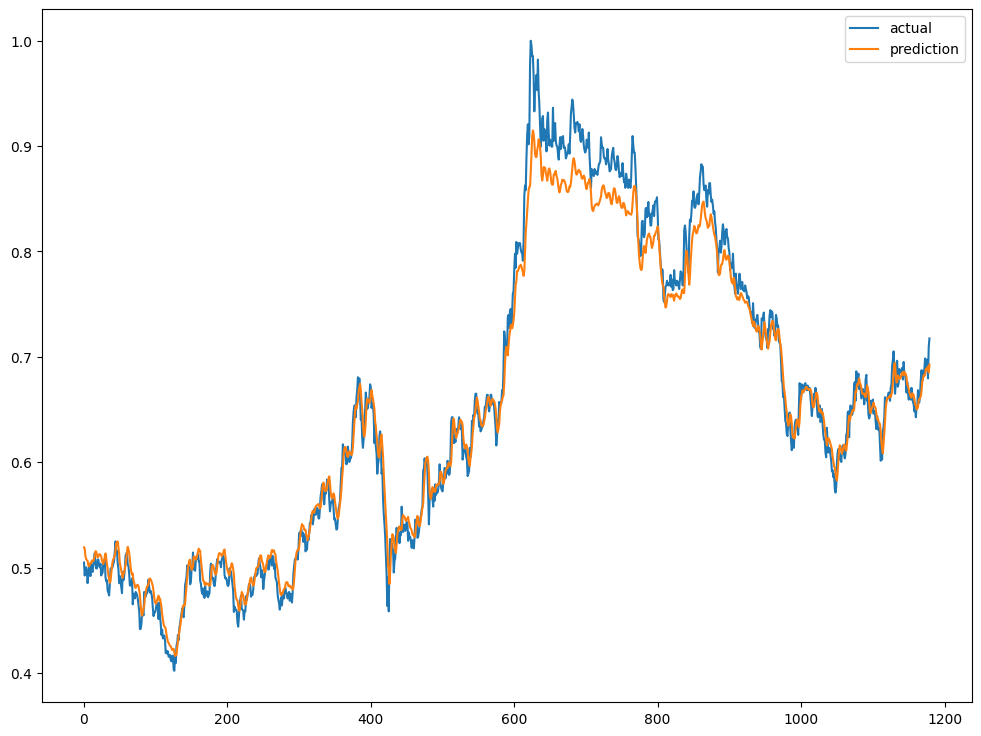

In [34]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()